In [145]:
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as py
try:
    from matplotlib_scalebar.scalebar import ScaleBar
except:
    %pip install matplotlib-scalebar

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\saman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
FOLDER = './oct_2025_stops'

stops_gdf = gpd.read_file(FOLDER+'/stops.shp')
stops_gdf.to_crs(2958)

,stop_id,stop_code,stop_name,geometry
0,262,662,Danforth Rd at Kennedy Rd,POINT (640096.073 4841618.907)
1,263,929,Davenport Rd at Bedford Rd,POINT (629006.481 4836958.897)
2,264,940,Davenport Rd at Dupont St,POINT (628820.49 4837073.415)
3,265,1871,Davisville Ave at Cleveland St,POINT (630683.404 4840062.438)
4,266,11700,Disco Rd at Attwell Dr,POINT (613221.563 4839663.01)
...,...,...,...,...
9324,25206,16750,55 Nugget Ave,POINT (640138.01 4850278.594)
9325,25207,16753,Culford Rd at Maple Leaf Dr South Side,POINT (621640.237 4840993.992)
9326,25208,16754,1 Front St West - Union Station,POINT (630828.633 4833856.34)
9327,25209,16757,Eglinton Ave West at Russell Rd,POINT (618211.398 4837494.367)


In [3]:
# route_gdf.plot(column = 'route_type')

# def add_weights(gdf):
#     mapping = {1: 4, 0: 2, 3: 1}

#     gdf.loc['weight'] = 0

#     for index, row in gdf.iterrows():
#         gdf.loc[index,'weight'] = mapping[row['route_type']]
#     return gdf


# t = add_weights(route_gdf)
# print(t['weight'])
# print(route_gdf.head(2))


In [4]:
# # break each route into stops which maintain weights
# from shapely import Point, LineString, MultiLineString

# points = []
# weights = []
# #stop_weight = gpd.GeoDataFrame({'weight': []}, geometry = gpd.GeoSeries(Point()))
# for index, row, in route_gdf.iterrows():
#     segment = route_gdf.loc[index,'geometry']

#     if type(segment) == type(MultiLineString()):
#         for line in segment.geoms:
#             start_p = line.coords[0]
#             points.append(Point(start_p))
#             weights.append(row['weight'])
#     else:
#         start_p = line.coords[0]
#         points.append(Point(start_p))
#         weights.append(row['weight'])

# stops = gpd.GeoDataFrame({'weights': weights, 'geometry': points}, crs = 'EPSG:2958')


In [5]:
try:
    import geoplot
except:
    %pip install geoplot
    import geoplot




Index(['stop_id', 'stop_code', 'stop_name', 'geometry'], dtype='object')


<Axes: xlabel='None', ylabel='None'>

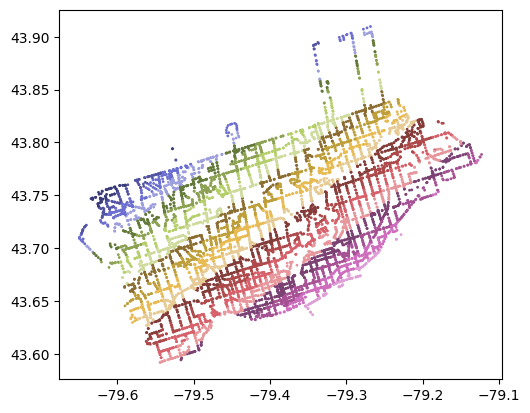

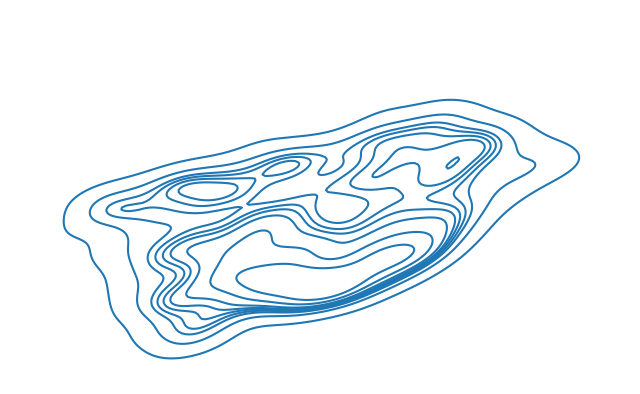

In [6]:
print(stops_gdf.columns)
stops_gdf['color'] = stops_gdf.geometry.x * stops_gdf.geometry.y
stops_gdf.plot(column = 'color', cmap = 'tab20b', markersize = 1)
geoplot.kdeplot(stops_gdf)

using the exact code from here:
https://geopandas.org/en/stable/gallery/plotting_with_folium.html 

not showing up

In [11]:
import folium
from folium import plugins
map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=10)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in stops_gdf.geometry]
#print(heat_data)

heat_data
plugins.HeatMap(heat_data).add_to(map)
map

# edit this to look nicer
#display(map)
map.save('out.html')


In [110]:
from shapely import Point, Polygon

neighbourhood_file = './toronto_neighbourhoods/neighbourhood.shp'
neighbourhood_gdf = gpd.read_file(neighbourhood_file)[['FIELD_3', 'geometry']]
neighbourhood_gdf = neighbourhood_gdf.to_crs('EPSG:2958')



https://gis.stackexchange.com/questions/419702/number-of-points-in-polygon-not-equal-in-qgis-and-geopandas 
used this to help count points

Index(['FIELD_3', 'geometry', 'n_points'], dtype='object')
here
here
<class 'geopandas.geodataframe.GeoDataFrame'>


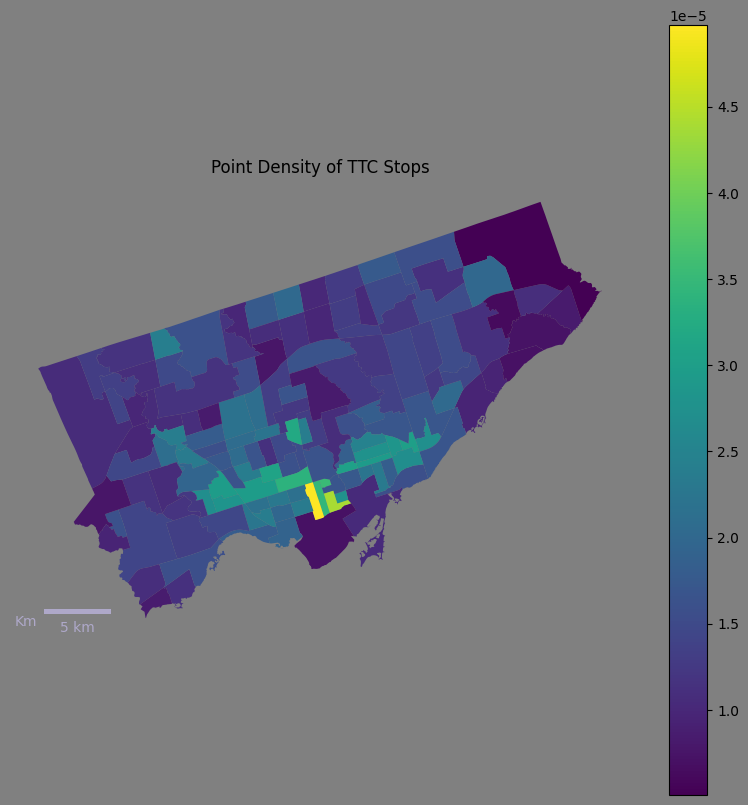

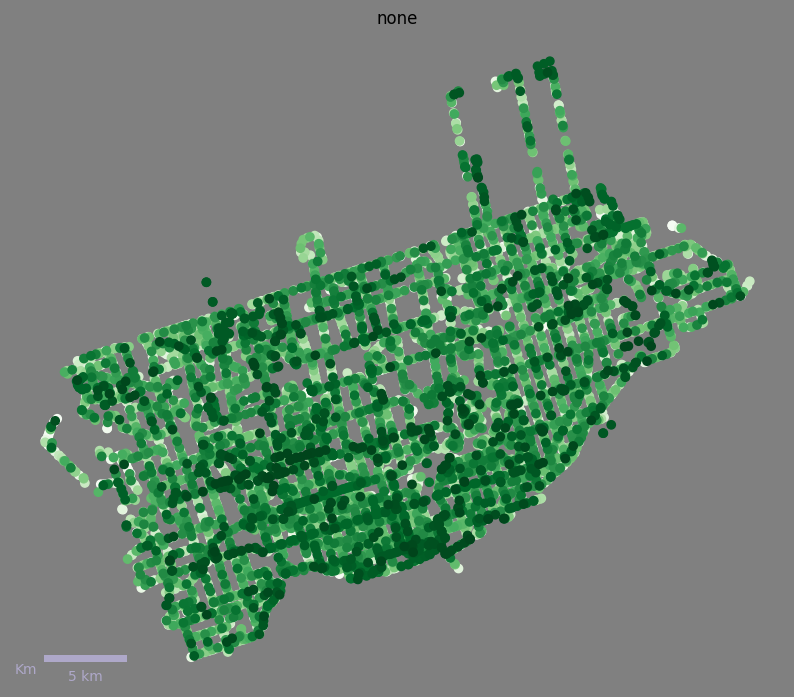

In [157]:
#aggregate stop counts to neighbourhoods
neighbourhood_copy = neighbourhood_gdf.copy()

from plot_formatter import clean_plot

stops_gdf = stops_gdf.to_crs('EPSG:2958')
neighbourhood_copy.to_crs('EPSG:2958')
# fig, ax = py.subplots(1,1, figsize = (12,12))

stops_gdf['point'] = stops_gdf['geometry'].copy()

out = neighbourhood_copy.merge(neighbourhood_copy.sjoin(stops_gdf).groupby('FIELD_3').size().rename('n_points').reset_index())

print(out.columns)
out['point_density'] = out['n_points']/out.area
# out.plot(ax=ax, column = 'point_density', cmap ='inferno', legend = True)
# # stops_gdf.plot(ax, color = 'green', markersize=0.5)
# ax.set_axis_off()
clean_plot(out, 'point_density', 'Point Density of TTC Stops', 'Stops per Square Meter')
clean_plot(stops_gdf, None, 'none', 'none', 'Greens', ax =ax)
print(type(neighbourhood_copy))